In [1]:
import json
import os

path_to_submission_file = os.path.join("..", "01_output_evaluation_Llama-rearc_with_ttt", "submission.json")
with open(path_to_submission_file, 'r') as file:
    data_submission = json.load(file)

print(f"submission data is of type {type(data_submission)} with length {len(data_submission)}")

first_key = list(data_submission.keys())[0]
print(f"first key is {first_key} and returns type {type(data_submission[first_key])}")

submission data is of type <class 'dict'> with length 100
first key is ea786f4a and returns type <class 'list'>


In [4]:
# Load training and testing data
path_to_data = os.path.join("..", "data", "arc-agi_training_challenges.json")
path_to_data_solutions = os.path.join("..", "data", "arc-agi_training_solutions.json")

with open(path_to_data, 'r') as file:
    data_train = json.load(file)
with open(path_to_data_solutions, 'r') as file:
    data_train_solutions = json.load(file)

print(f"training data is of type {type(data_train)} with length {len(data_train)}")

first_key = list(data_submission.keys())[0]
print(f"first key is {first_key} and returns type {type(data_train[first_key])}")

training data is of type <class 'dict'> with length 400
first key is ea786f4a and returns type <class 'dict'>


Visualizing some tasks and solutions


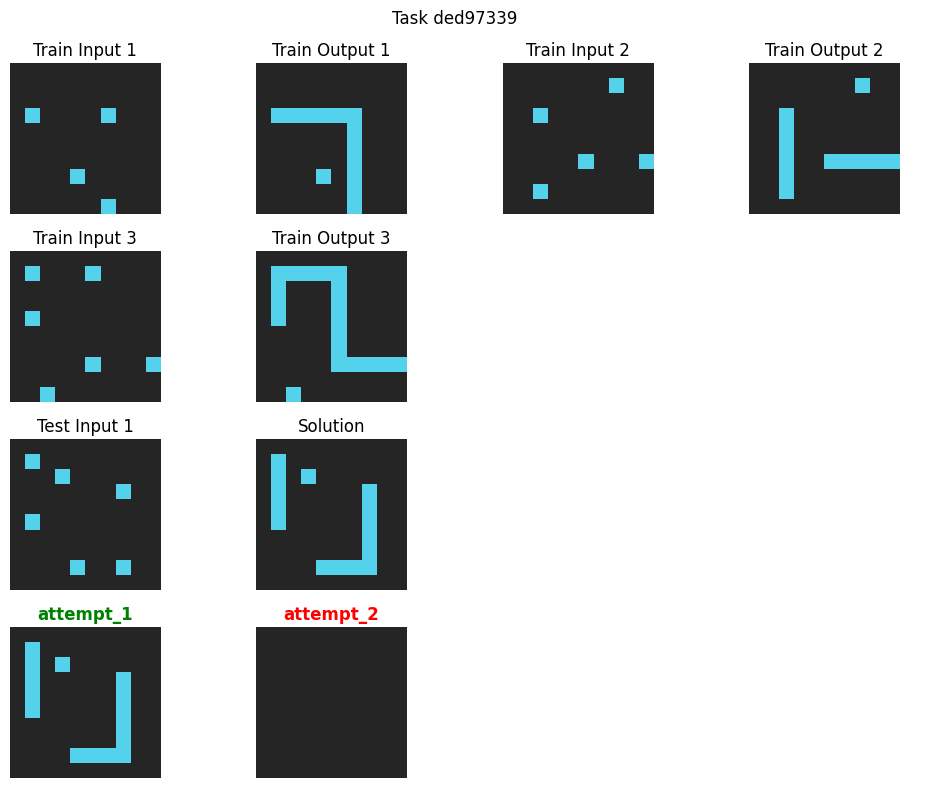

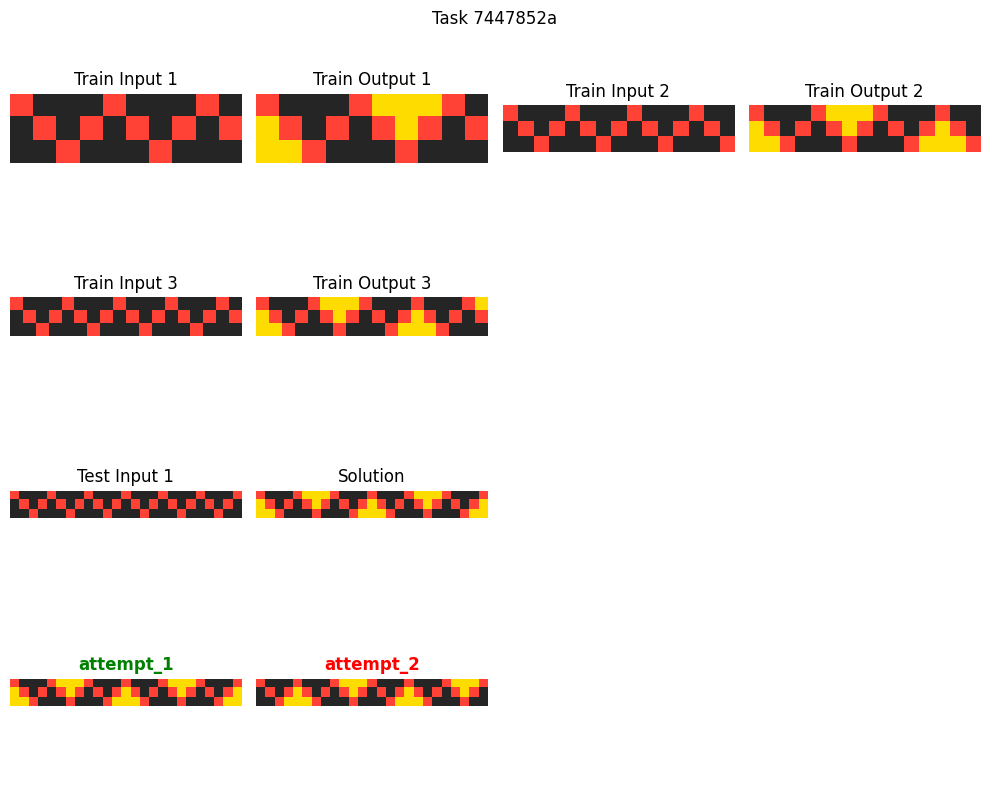

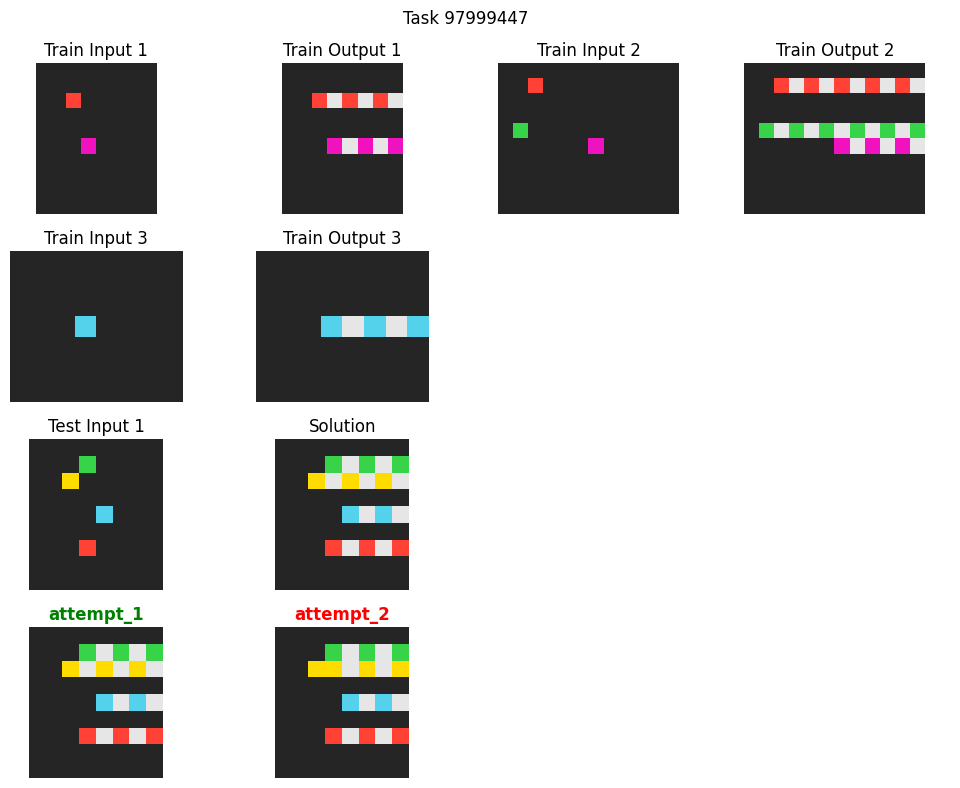

In [3]:
from visualize_grids import plot_task_and_solution

print("Visualizing some tasks and solutions")

for key in list(data_submission.keys())[55:58]:
    plot_task_and_solution(data_train[key], data_train_solutions[key], data_submission[key][0], key)

# The tasks it failed on

Results:
	W TTT Score:	90.0%
Number of tasks not solved: 10


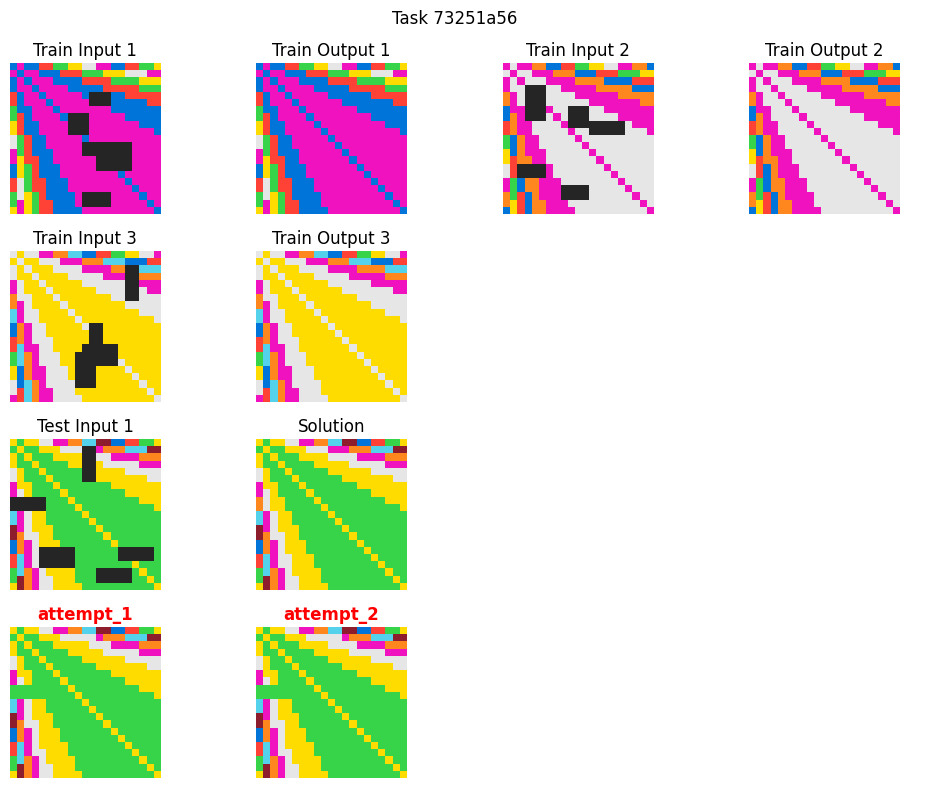

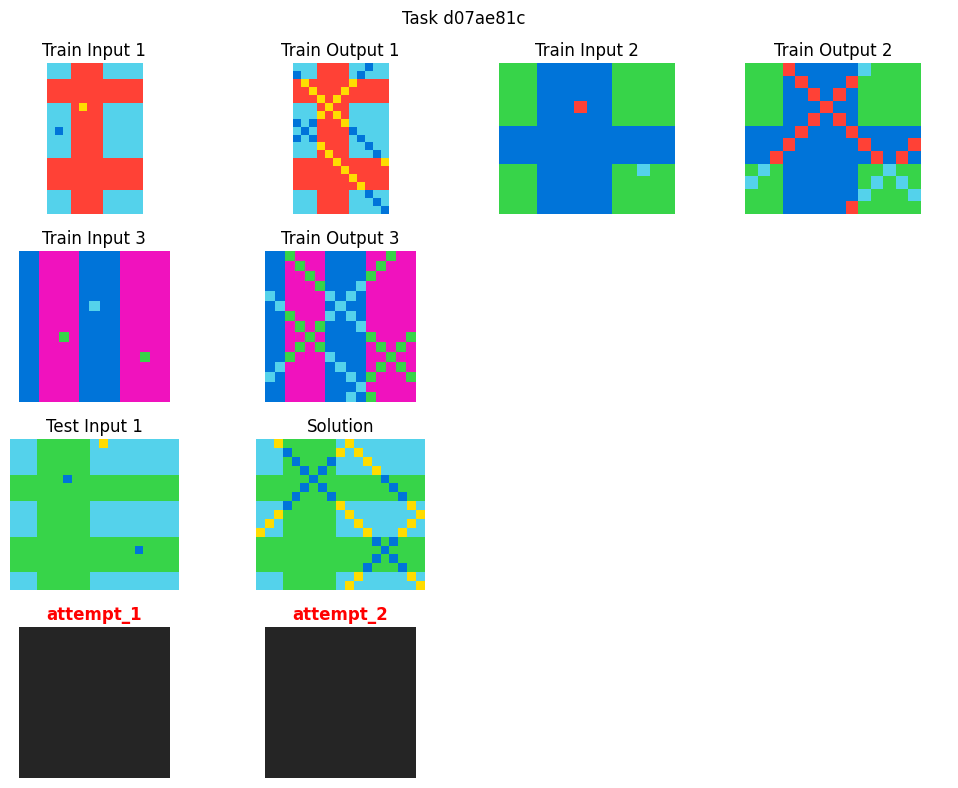

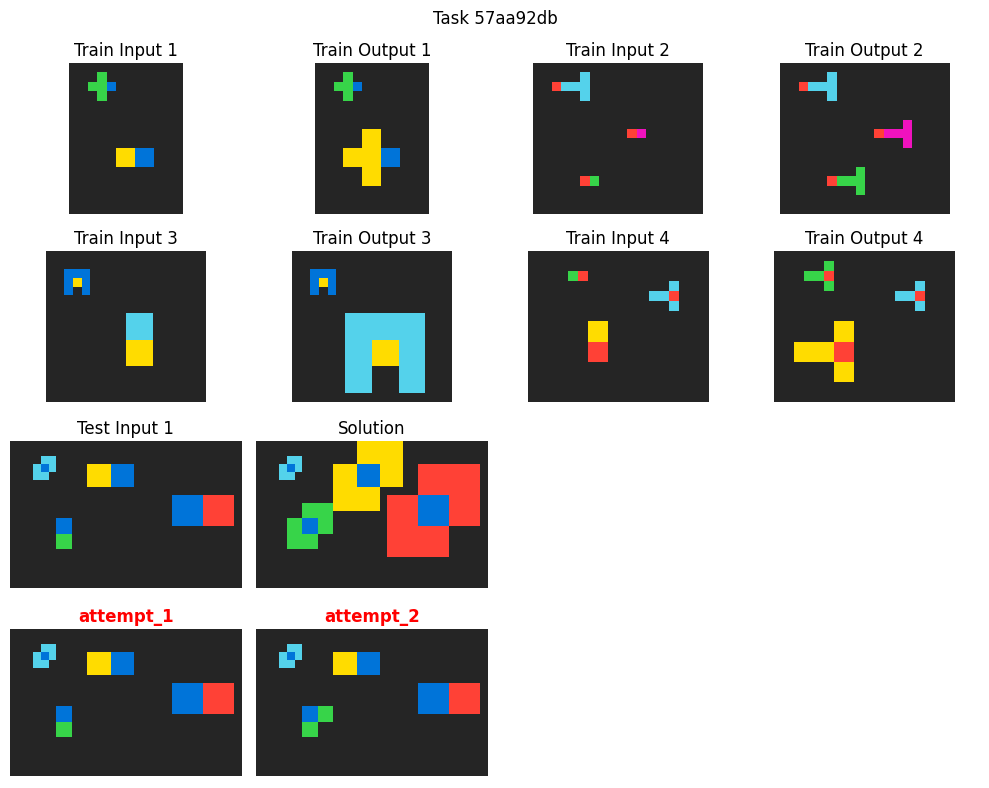

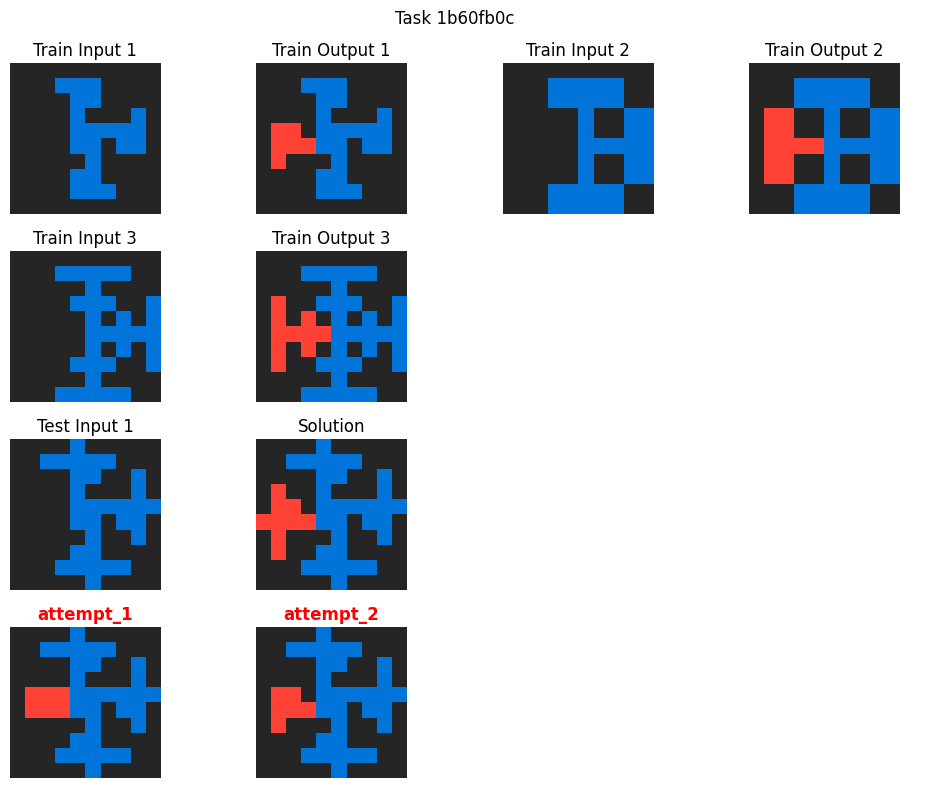

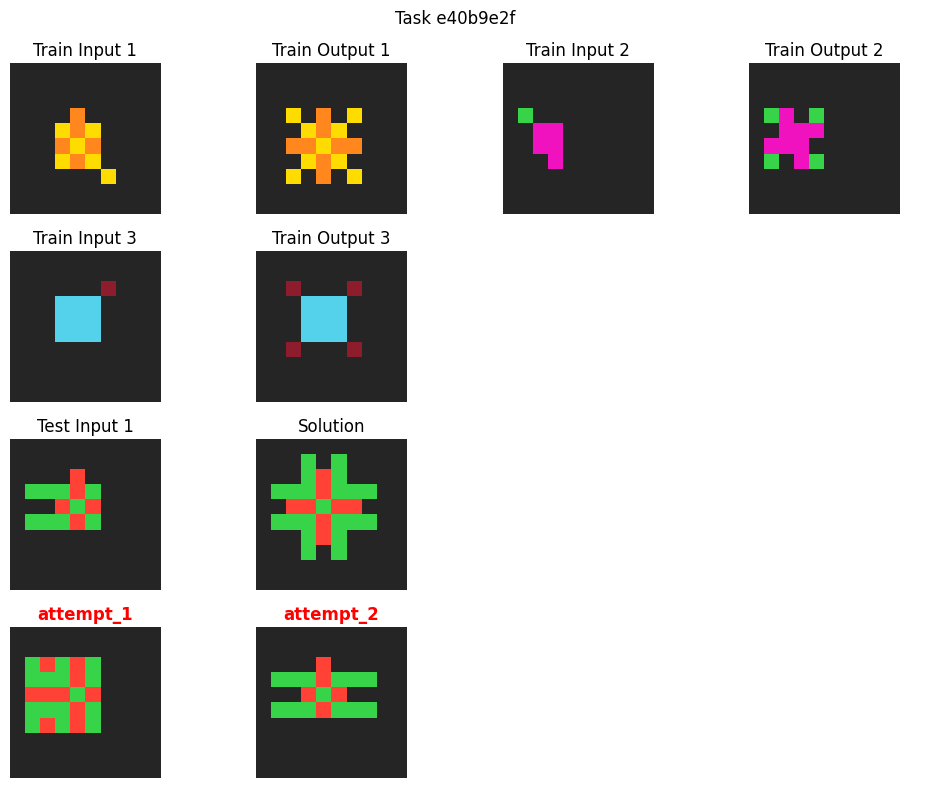

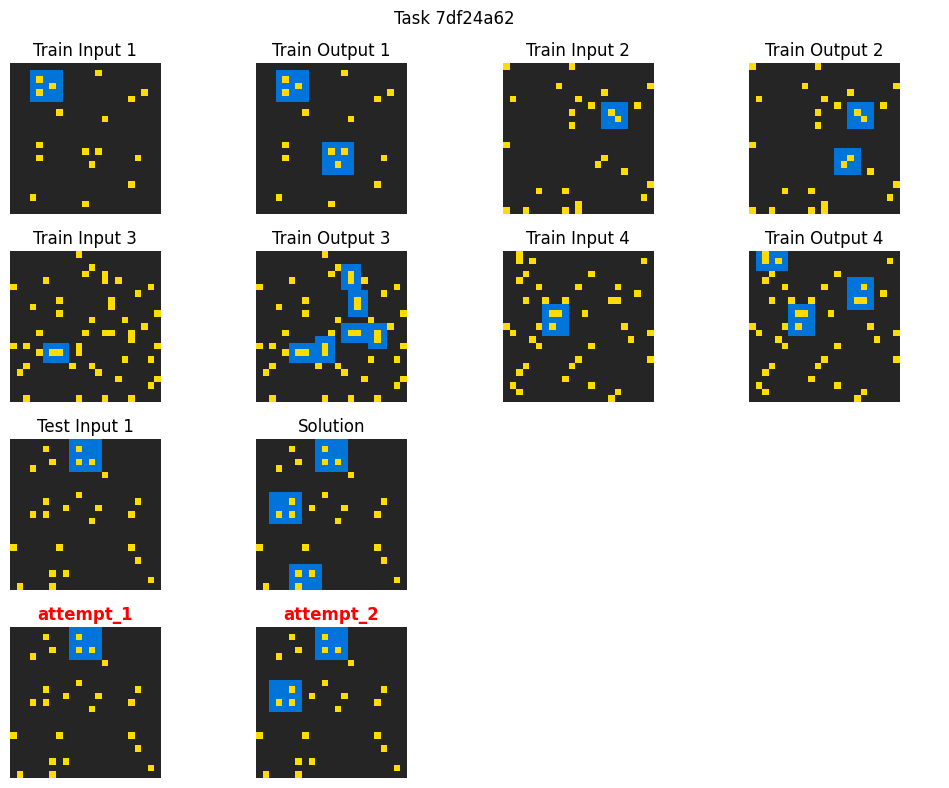

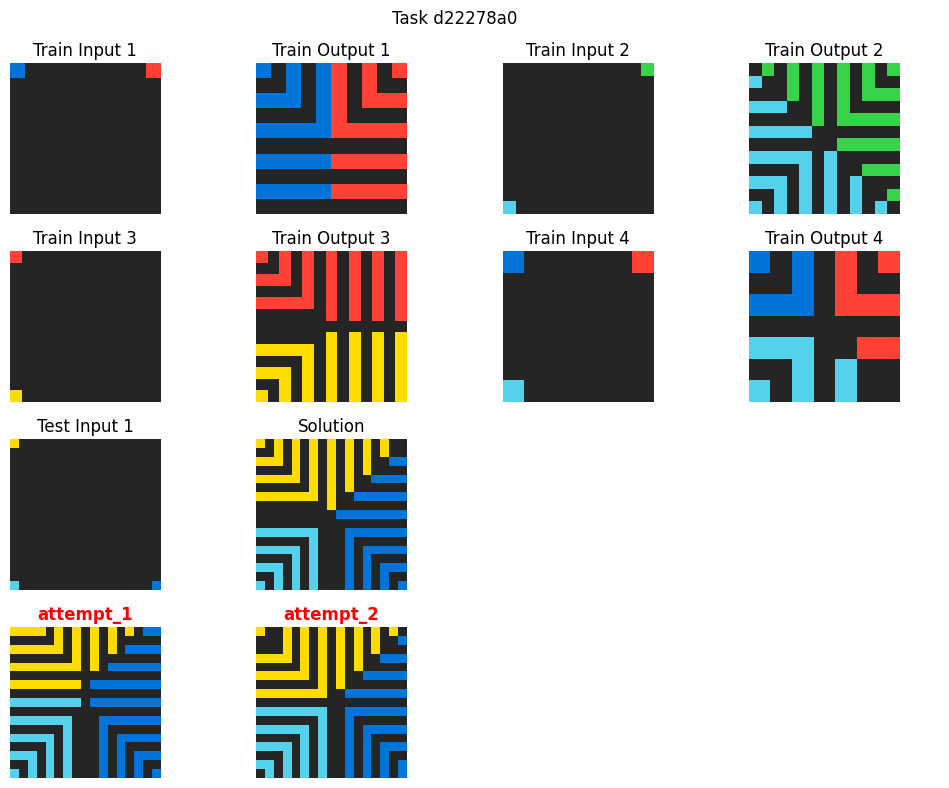

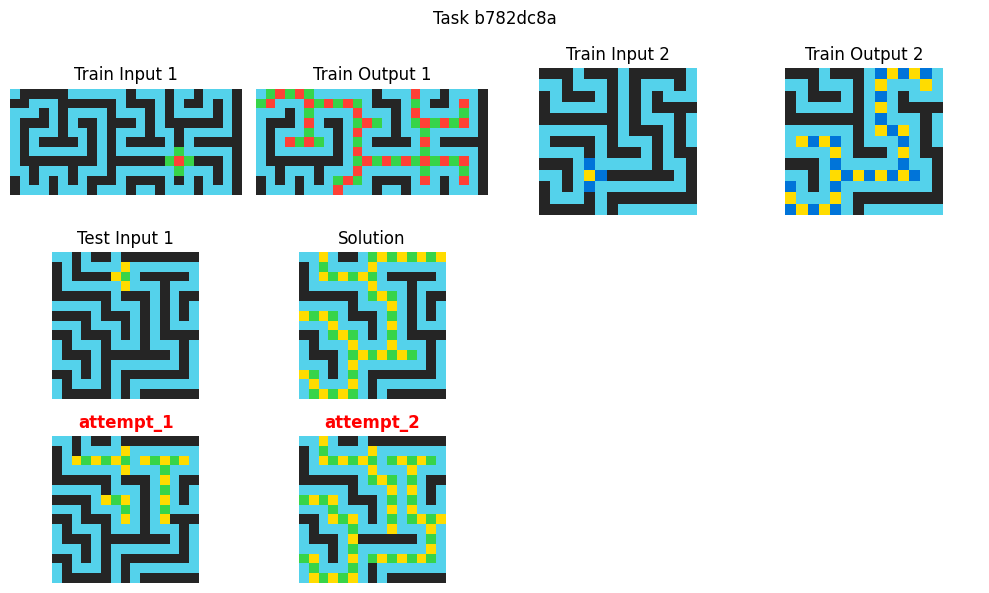

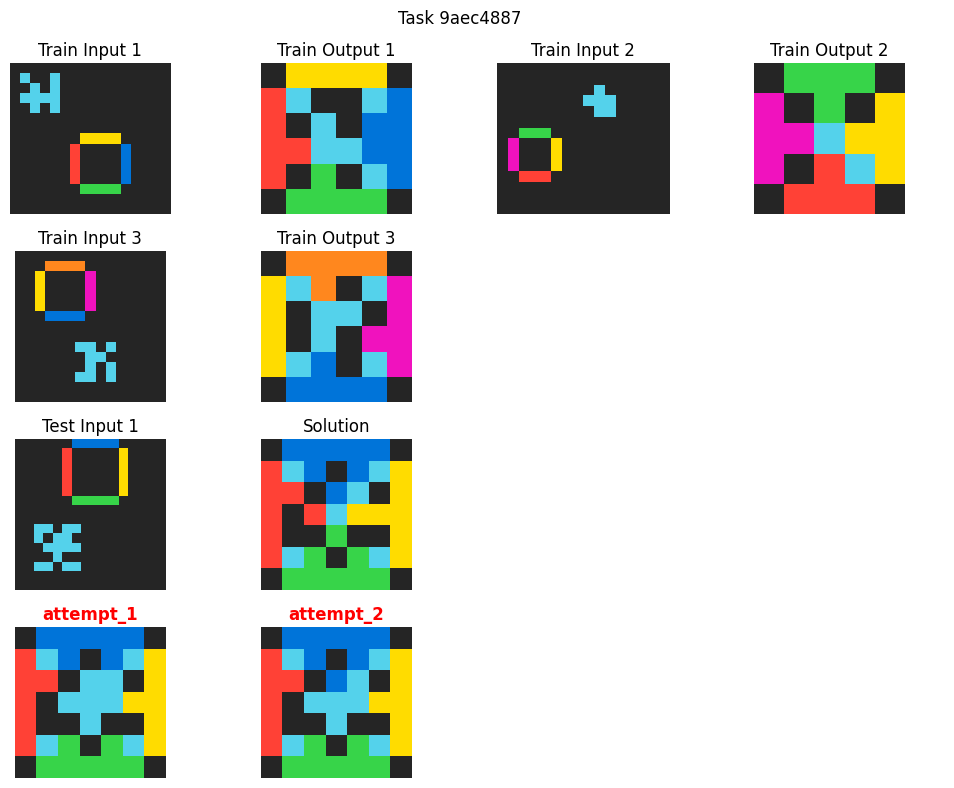

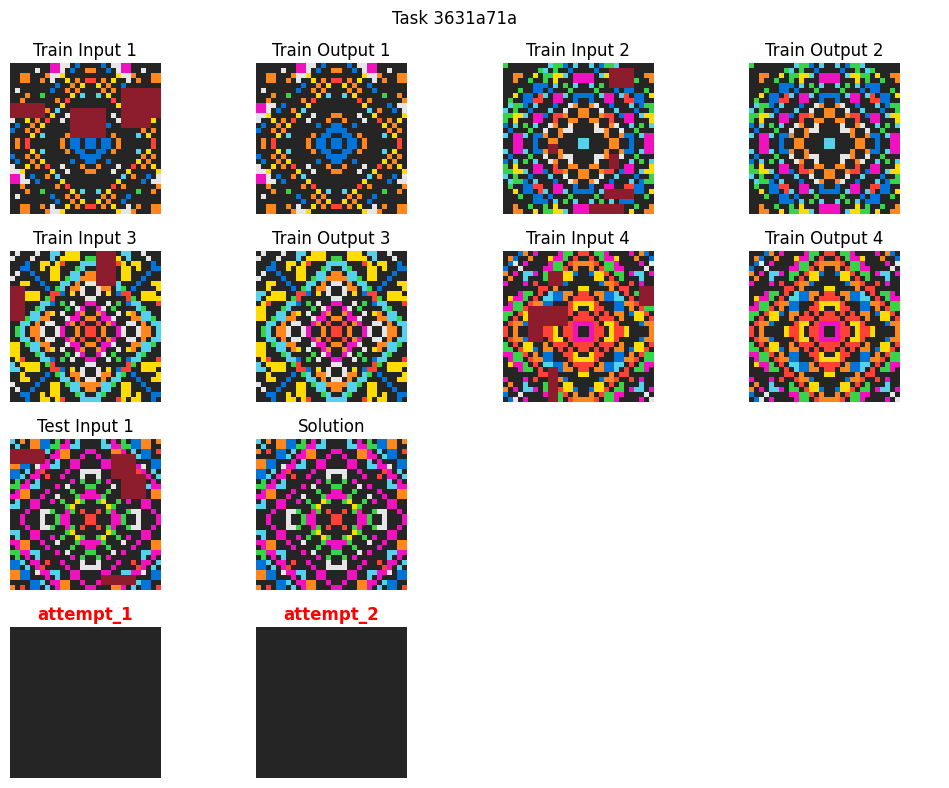

In [19]:
def check_submission(submission, solutions):
    # Check the submission against the solutions
    results = dict()
    for task_id, task_submission in submission.items():
        # task_submission[0] is a dictionary {"attempt_1":[grid], "attempt_2":[grid]} 

        task_solution = solutions[task_id][0]

        if task_submission[0]["attempt_1"] == task_solution:
            results[task_id] = 1
        elif task_submission[0]["attempt_2"] == task_solution:
            results[task_id] = 1
        else:
            results[task_id] = 0    
    return results

def get_score(results):
    total_correct = sum(results.values())
    total = len(results.keys())
    return round(total_correct/total, 2)

res_data_submission = check_submission(data_submission, data_train_solutions)

print("Results:")
print(f"\tW TTT Score:\t{get_score(res_data_submission):.1%}")


data_not_solved = [{key:data_submission[key]} for key, value in res_data_submission.items() if value == 0]
print(f"Number of tasks not solved: {len(data_not_solved)}")

for task in data_not_solved:
    task_id = list(task.keys())[0]
    plot_task_and_solution(data_train[task_id], data_train_solutions[task_id], data_submission[task_id][0], task_id)

In [ ]:
# Blank solutions:
"3631a71a"
"d07ae81c"